# M3 - WEEK 5 | PROJECT: Make your data shine!

> **Team Members**
* McAndrew Saad
* Michael Odartei Mills

From the [URL for datasets](https://makingnoiseandhearingthings.com/2018/04/19/datasets-for-data-cleaning-practice/) , we settled on [The Metropolitan Museum of Art Open Access](https://github.com/metmuseum/openaccess/) data.

**Data Summary**: The Metropolitan Museum of Art provides select datasets of information on more than 420,000 artworks in its Collection for unrestricted commercial and noncommercial use. To the extent possible under law, The Metropolitan Museum of Art has waived all copyright and related or neighboring rights to this dataset using Creative Commons Zero. This work is published from: The United States Of America. You can also find the text of the CC Zero deed in the file LICENSE in this repository. These select datasets are now available for use in any media without permission or fee; they also include identifying data for artworks under copyright. The datasets support the search, use, and interaction with the Museum’s collection.

**Issues**: Missing values, inconsistent information, missing documentation, possible duplication, mixed text and numeric data.

**Project Summary**: We attempted all issues raised and finally zoomed in to specified period of 1900 to last date. Finally duly exporting the resulting data in csv format

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the csv file
dataset = pd.read_csv('museumdata.csv', sep=',', parse_dates=['Metadata Date'])


F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#info
print(dataset.shape)
print("")
dataset.info(null_counts=True)

(473427, 44)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473427 entries, 0 to 473426
Data columns (total 44 columns):
Object Number              473427 non-null object
Is Highlight               473427 non-null bool
Is Public Domain           473427 non-null bool
Object ID                  473427 non-null int64
Department                 473427 non-null object
Object Name                471522 non-null object
Title                      443364 non-null object
Culture                    206207 non-null object
Period                     88762 non-null object
Dynasty                    23134 non-null object
Reign                      11160 non-null object
Portfolio                  23035 non-null object
Artist Role                269363 non-null object
Artist Prefix              88961 non-null object
Artist Display Name        271457 non-null object
Artist Display Bio         232252 non-null object
Artist Suffix              11968 non-null object
Artist Alpha Sort          271423 no

### Initial Dropping of Columns
With a dataset of 44 columns, we **dropped all empty columns and all columns with less than 100_000 entries.**

In [4]:
#generating the list of bools to on columns to be dropped : True means drop, False means keep
dropping_bool = [value.count() < 100_000 for key, value in dataset.items()]

#zipping the column names against their bools
dropping_zip = zip(dataset.columns,dropping_bool)

#generating the list of columns to be dropped
dropping_cols = []
for a in dropping_zip:
    if a[1] == True:
        dropping_cols.append(a[0])

dropping_cols

['Period',
 'Dynasty',
 'Reign',
 'Portfolio',
 'Artist Prefix',
 'Artist Suffix',
 'Geography Type',
 'City',
 'State',
 'County',
 'Country',
 'Region',
 'Subregion',
 'Locale',
 'Locus',
 'Excavation',
 'River',
 'Rights and Reproduction']

In [5]:
dataset = dataset.drop(dropping_cols, axis=1)

In [6]:
#new info
print(dataset.shape)
print("")
dataset.info(null_counts=True)

(473427, 26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473427 entries, 0 to 473426
Data columns (total 26 columns):
Object Number          473427 non-null object
Is Highlight           473427 non-null bool
Is Public Domain       473427 non-null bool
Object ID              473427 non-null int64
Department             473427 non-null object
Object Name            471522 non-null object
Title                  443364 non-null object
Culture                206207 non-null object
Artist Role            269363 non-null object
Artist Display Name    271457 non-null object
Artist Display Bio     232252 non-null object
Artist Alpha Sort      271423 non-null object
Artist Nationality     182498 non-null object
Artist Begin Date      234741 non-null object
Artist End Date        232458 non-null object
Object Date            458504 non-null object
Object Begin Date      473427 non-null int64
Object End Date        473427 non-null int64
Medium                 466255 non-null object
Dimensio

In [7]:
dataset.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,...,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,The American Wing,Coin,One-dollar Liberty Head Coin,NaN,Maker,James Barton Longacre,...,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/1,NaT,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,The American Wing,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,Christian Gobrecht,...,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Metal,http://www.metmuseum.org/art/collection/search/2,NaT,"Metropolitan Museum of Art, New York, NY",NaN
2,67.265.9,False,False,3,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/3,NaT,"Metropolitan Museum of Art, New York, NY",NaN
3,67.265.10,False,False,4,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/4,NaT,"Metropolitan Museum of Art, New York, NY",NaN
4,67.265.11,False,False,5,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/5,NaT,"Metropolitan Museum of Art, New York, NY",NaN


### Initial Dropping of Rows
With a dataset of 473_427 entries, we first investigated the uniqueness of each entry and drop entries based on findings

In [8]:
# Checking for uniqueness

dataset['Object ID'].is_unique

True

In [9]:
dataset['Object Number'].is_unique

False

In [10]:
# verify duplicates
#dataset = 
dataset[dataset.duplicated()]

# NO duplicates to be removed

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,...,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags


# Investigating outliers in objects with lifespan within the last century(1900-)

Objects that were brought in from 1900 till date and have either been taken out or currently available(2019)


(107573, 26)


,Object Begin Date
count,107573.000000
mean,1938.633021
std,28.060612
min,1900.000000
25%,1915.000000
50%,1935.000000
75%,1960.000000
max,2019.000000


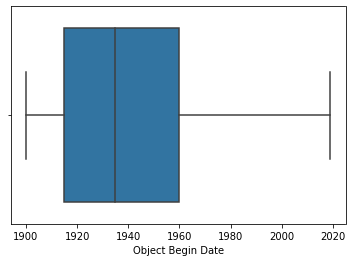

In [23]:
#checking for outliers of objects begin date in the last century 
dataset= dataset[dataset['Object Begin Date'] >= 1900]
sns.boxplot(x=dataset['Object Begin Date'])

print(dataset.shape)
dataset[['Object Begin Date']].describe()

(107573, 26)


,Object End Date
count,107573.000000
mean,1946.460515
std,27.296608
min,1901.000000
25%,1925.000000
50%,1941.000000
75%,1967.000000
max,2099.000000


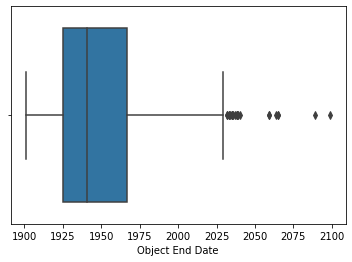

In [12]:
#checking for outliers of objects whose lifespan are within the last century 
dataset= dataset[dataset['Object End Date'] > 1900]
sns.boxplot(x=dataset['Object End Date'])  

print(dataset.shape)
dataset[['Object End Date']].describe()

In [13]:
# It is found that for objects that
beyond_2025 = dataset[dataset['Object End Date']>2025]
print(f'{beyond_2025.shape[0]} objects were found to be outliers of objects that were added in the last century')
print('These objects have earliest end date as 2025 and last date as 2099')

33 objects were found to be outliers of objects that were added in the last century
These objects have earliest end date as 2025 and last date as 2099


### Misc Investigations

In [14]:
#How many objects are in public domain?
dataset['Is Public Domain'].value_counts()

False    105706
True       1867
Name: Is Public Domain, dtype: int64

In [15]:
#Mention some object classifications available...
dataset['Classification'].value_counts()

Prints|Ephemera                         18198
Prints                                  17067
Photographs                             13666
Drawings                                 7827
Negatives                                6082
                                        ...  
Aerophone-Whistle Flute-vessel flute        1
Metalwork-Pewter|Glass                      1
Outerwear-Unisex                            1
Paintings|Paper-Graphics                    1
Chordophone-Accessories-plectrum            1
Name: Classification, Length: 505, dtype: int64

<br/>

## Some Visualizations


### Correlation matrix below to find any possible relation between the numerical data

In [16]:
correlations = dataset.corr()
correlations

,Is Highlight,Is Public Domain,Object ID,Object Begin Date,Object End Date
Is Highlight,1.000000,0.014435,0.005018,0.003619,-0.007793
Is Public Domain,0.014435,1.000000,-0.088566,-0.153018,-0.088518
Object ID,0.005018,-0.088566,1.000000,-0.087111,-0.154899
Object Begin Date,0.003619,-0.153018,-0.087111,1.000000,0.780140
Object End Date,-0.007793,-0.088518,-0.154899,0.780140,1.000000


Text(0.5, 1, 'Correlation Heatmap')

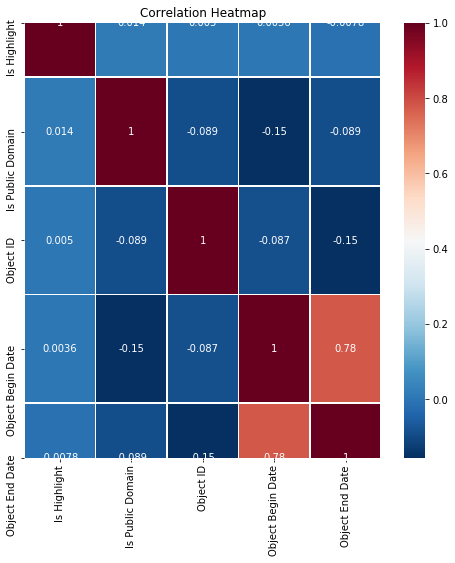

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(correlations , annot = True , cmap = 'RdBu_r' , linewidth = 0.7)
plt.title('Correlation Heatmap')

### Pulling some department counts and plotting a pie chart showing the distribution of the departments having more than 1000 artworks

In [18]:
departments = pd.DataFrame(dataset['Department'].value_counts())
departments.columns=['Count']
departments.sort_values(by="Count",ascending=False)
departments.head()

,Count
Drawings and Prints,41468
Photographs,22775
Costume Institute,20809
Modern and Contemporary Art,12978
Asian Art,2688


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


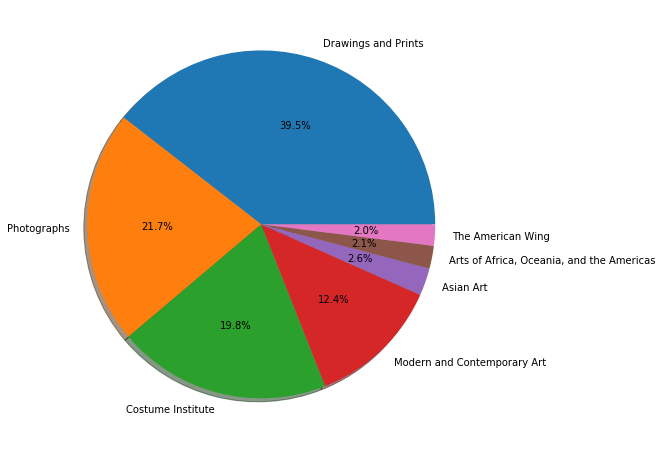

In [19]:
plt.figure(figsize=(8,8))
temp = departments[departments['Count']>=1000]
plt.pie(temp,labels=temp.index, autopct= '%.1f%%', shadow = True)
plt.show(block=False)

### Showing the different types of mediums vs the number of artworks made of that  medium

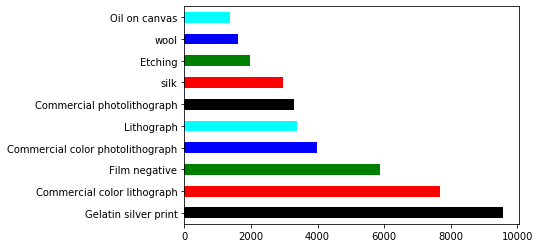

In [20]:
color=['black', 'red', 'green', 'blue', 'cyan']
dataset['Medium'].value_counts()[:10].plot(kind = 'barh', color=color)

### Showing the different Cultures vs the number of artworks made by that Culture

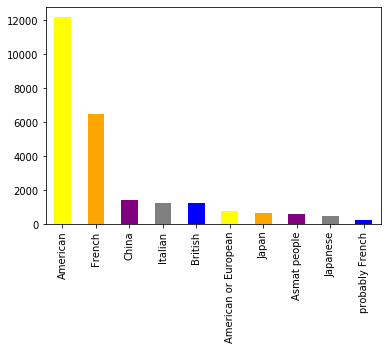

In [21]:
color=['yellow', 'orange', 'purple', 'grey', 'blue']
dataset['Culture'].value_counts()[:10].plot(kind = 'bar', color=color)

<br/>

## Exporting the dataset (from 1900-)

In [22]:
dataset.to_csv('clean1900_museumdata.csv')